In [1]:
import pandas as pd
import pandasql as sql
import matplotlib.pyplot as plt
import numpy as np

In [2]:
imdb = pd.read_csv("data/movie_metadata.csv")

In [3]:
type(imdb)

pandas.core.frame.DataFrame

## Movie was longer then an hour? Two hours?

In [4]:
movie_length = sql.sqldf("SELECT duration FROM imdb", locals())
movie_length.dropna(inplace=True)


one_hour = 0
two_hour = 0
for dec in movie_length["duration"]:
    if dec > 60:
        one_hour += 1
    if dec > 120:
        two_hour += 2
    
prob_longer_1_hour = one_hour / movie_length["duration"].count()
prob_longer_2_hour = two_hour / movie_length["duration"].count() 
print("Longer then 1 hour: {}".format(prob_longer_1_hour))
print("Longer then 2 hour: {}".format(prob_longer_2_hour))

Longer then 1 hour: 0.978321400159109
Longer then 2 hour: 0.42442322991249004


## Movie was directed by Steven Spielberg

In [5]:
director = sql.sqldf("SELECT director_name FROM imdb", locals())
count = 0
for direc in director['director_name']:
#     print(direc)
    if direc == "Steven Spielberg":
        count += 1

prob_spielberg = count / len(director['director_name'])
print("Prob Movie was directed by Stephen Speilberg: {}".format(prob_spielberg))

Prob Movie was directed by Stephen Speilberg: 0.005155661312710688


## Movie directed by Clint Eastwood will gross under budget?

In [6]:
# director = imdb['director_name'][~pd.isnull(imdb['director_name'])]

rates = imdb[['imdb_score', 'gross', 'budget']]

count = 0
for i in range(len(imdb)):
    pass
#     print(imdb.loc[i])
#     if movie["gross"] < movie['budget']:
#         count += 1

In [21]:
gross_low = sql.sqldf("SELECT movie_title FROM imdb where director_name == 'Clint Eastwood' and gross < budget", locals())
all_CE = sql.sqldf("SELECT movie_title FROM imdb where director_name == 'Clint Eastwood'", locals())
prob_lose_money = float(gross_low.count()) / float(all_CE.count())
print("Gross < Budget: {}".format(prob_lose_money))
gross_low.count()


Gross < Budget: 0.35


movie_title    7
dtype: int64

## Movie generaly grossed more then it's budget?

In [8]:
gross_low = sql.sqldf("SELECT movie_title, gross, budget FROM imdb WHERE gross >= budget", locals())
# loose_money = int(gross_low.count()) / imdb['gross'].count()
# loose_money
# print("Gross < Budget: {}".format(loose_money))

In [9]:
gross_low.head(20)
gross_low.budget.hasnans

False

## Movie grossed over the average gross?

In [10]:
gross = sql.sqldf("SELECT gross FROM imdb")
gross.mean()
gross_high = sql.sqldf("SELECT movie_title FROM imdb WHERE gross > 4.846841e+07", locals())
prob_higher_then_average_gross = gross_high.count() / imdb['movie_title'].count()
print("Gross over the average gross: {}".format(prob_higher_then_average_gross))

Gross over the average gross: movie_title    0.262939
dtype: float64


## False Positive and False Negative rate?

In [11]:
high_rating_low_gross = sql.sqldf("SELECT imdb_score FROM imdb WHERE gross < budget and imdb_score > 6", locals())
low_rating_high_gross = sql.sqldf("SELECT imdb_score FROM imdb WHERE gross > budget and imdb_score < 6", locals())
num_mov = sql.sqldf("SELECT imdb_score FROM imdb WHERE imdb_score > 6", locals())

false_positive = high_rating_low_gross.count() / num_mov.count()
low_rating_high_gross = low_rating_high_gross.count() / imdb['movie_title'].count()

print("False Positive: {}".format(float(false_positive)))
print("False Negative: {}".format(float(low_rating_high_gross)))
# high_rating_low_gross

False Positive: 0.3366107576633892
False Negative: 0.0924053142970454


In [12]:
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

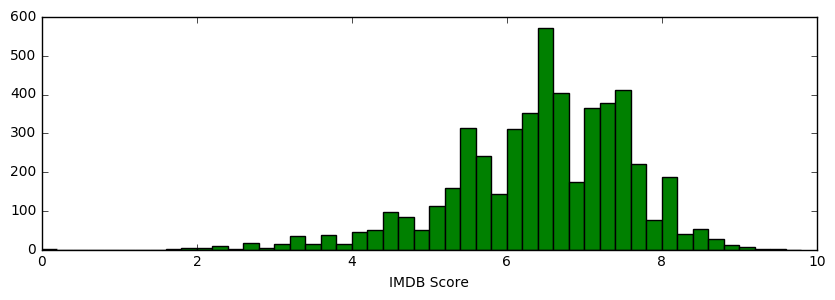

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

In [22]:
data = imdb.imdb_score
plt.figure(figsize=(10, 3))
plt.hist(data, bins=np.arange(0, 10, .2), color='green')
plt.xlabel("IMDB Score")
plt.show()
data.describe()

## IMDB Rating system distribution

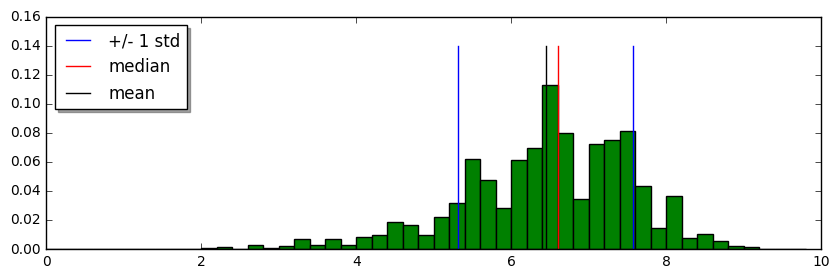

Median is 0.1578623835018833 Standard Deviations Higher then the Mean


In [14]:
heights, edges = np.histogram(data, bins=np.arange(0, 10, .20))
probs = heights / sum(heights)
plt.figure(figsize=(10,3))
plt.bar(edges[:-1], probs, width=edges[1] - edges[0], color="green")
h1 = plt.plot([data.mean() - data.std(), data.mean() - data.std()],[0, 0.14], color="blue", label="+/- 1 std")
h2 = plt.plot([data.mean() + data.std(), data.mean() + data.std()],[0, 0.14], color='blue')
h3 = plt.plot([data.median(), data.median()], [0, 0.14], color='red', label="median")
h4 = plt.plot([data.mean(), data.mean()], [0, 0.14], color='black', label="mean")
plt.legend(loc="upper left", shadow=True)
plt.show()
print("Median is {} Standard Deviations Higher then the Mean".format(data.median() - data.mean()))
# data.describe()

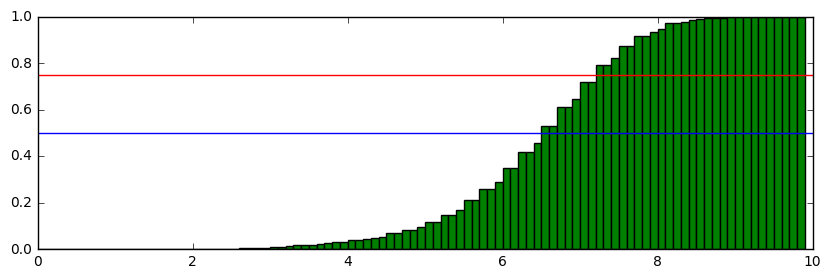

In [15]:
heights, edges = np.histogram(data, bins=np.arange(0, 10, .1))
probs = heights / sum(heights)
plt.figure(figsize=(10,3))
plt.bar(edges[:-1], probs.cumsum(), width=edges[1] - edges[0], color="green")
plt.plot([0, 10], [.5, .5])
plt.plot([0, 10], [.75, .75], color="red")
plt.show()

## Movie Budgets

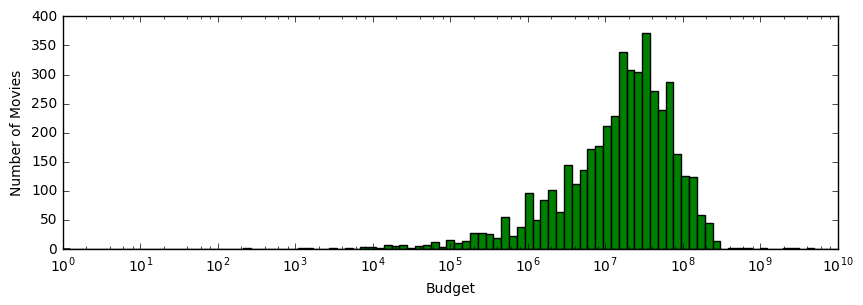

count    4.551000e+03
mean     3.975262e+07
std      2.061149e+08
min      2.180000e+02
25%      6.000000e+06
50%      2.000000e+07
75%      4.500000e+07
max      1.221550e+10
Name: budget, dtype: float64

In [19]:
data = imdb.budget
data.dropna(inplace=True)
# data = loans.StatedMonthlyIncome[(loans.StatedMonthlyIncome > 100) & (loans.StatedMonthlyIncome < 1E6)]
plt.figure(figsize=(10, 3))
plt.hist(data, bins=np.logspace(0, 10, 100), color="green")
plt.xlabel("Budget")
plt.ylabel("Number of Movies")
plt.xscale('log')
plt.show()
data.describe()

In [20]:
imdb.genres.map(lambda x: "Action" in x)

0        True
1        True
2        True
3        True
4       False
5        True
6        True
7       False
8        True
9       False
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20      False
21       True
22       True
23      False
24      False
25       True
26      False
27       True
28       True
29       True
        ...  
5013    False
5014     True
5015    False
5016    False
5017    False
5018    False
5019    False
5020    False
5021    False
5022    False
5023    False
5024    False
5025    False
5026    False
5027    False
5028    False
5029    False
5030    False
5031    False
5032    False
5033    False
5034    False
5035     True
5036    False
5037    False
5038    False
5039    False
5040    False
5041    False
5042    False
Name: genres, dtype: bool